# Homework 1

This page will help you vizualize eigenvectors and eigenvalues in 2 dimensions and how to do differentiation with python. This will also serve as a reference for the following libraries:
- [NumPy](http://www.numpy.org/), a library for scientific computation;
- [Matplotlib.pyplot](https://matplotlib.org/api/pyplot_summary.html), a module to generate mathematical plots quickly and easily.
- [SymPy](http://docs.sympy.org/latest/index.html), a library for symbolic computation;

Go through the cells below, reading the code and executing once cell at a time. Once you have gone through the examples, solve the simple examples at the bottom by creating your own cells and executing them. Submit you code cells and resulting plots with your homework on Gradescope.

## Problem 1

A square matrix can be visualized using the contour of its quadratic form ($x \rightarrow x^T A x$) and the vector field of its action ($x \rightarrow Ax$).

In order to achieve this we first need to get acquainted with NumPy for computations and matplotlib for plotting.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

I = np.eye(2)                           # This is the identity matrix in two dimensions
A = np.array([[5, 0], [0, 1]])          # A diagonal matrix which magifies the first component
B = np.array([[3, 2], [2, 3]])          # This is the same as A but rotated
C = np.array([[0, 1], [1, 0]])          # This matrix is not PSD
D = np.array([[0, 1], [-1, 0]])         # This is a rotation matrix with complex eigenvalues
E = np.array([[2, 1], [-1, 1]])         # A combination of the above

x = np.linspace(-5, 5, 51)              # Return an array containing evenly spaced values (spaced by -0.2)
y = np.linspace(-5, 5, 51)              # in the open interval [-5,5)

X, Y = np.meshgrid(x, y)                # Same as MATLAB meshgrid: returns coordinate matrices from coordinate vectors.

def quad(A, x, y):
    X = np.array([x, y])
    return np.einsum("...i,...j,ij", X.T, X.T, A)

def action(A, x, y):
    X = np.array([x, y])
    return np.einsum('ikl,ij->jkl', X, A)

### Plotting

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: No contour levels were found within the data range.


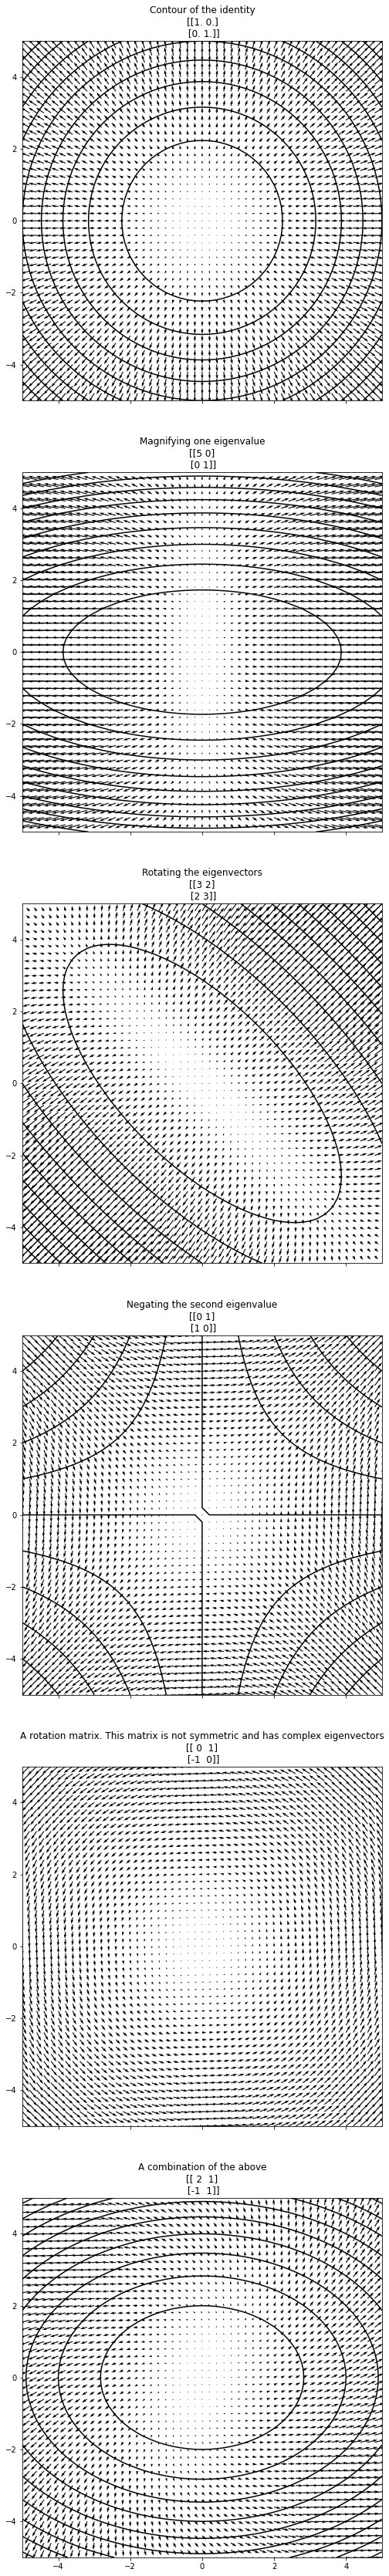

In [0]:
fig, ax = plt.subplots(6, 1, sharey="all", sharex="all", figsize=(10, 60))
plt.axis([-5, 5, -5, 5])

ax[0].contour(X, Y, quad(I, X, Y), 10, colors='k', linestyles='solid')
U, V = action(I, X, Y)
ax[0].quiver(X, Y, U, V, edgecolor='k', scale=200)
ax[0].set_aspect("equal")
ax[0].set_title("Contour of the identity\n" + np.array2string(I))

ax[1].contour(X, Y, quad(A, X, Y), 10, colors='k', linestyles='solid')
U, V = action(A, X, Y)
ax[1].quiver(X, Y, U, V, edgecolor='k', scale=500)
ax[1].set_aspect("equal")
ax[1].set_title("Magnifying one eigenvalue\n"+ np.array2string(A))

ax[2].contour(X, Y, quad(B, X, Y), 10, colors='k', linestyles='solid')
U, V = action(B, X, Y)
ax[2].quiver(X, Y, U, V, edgecolor='k', scale=500)
ax[2].set_aspect("equal")
ax[2].set_title("Rotating the eigenvectors\n"+ np.array2string(B))

ax[3].contour(X, Y, quad(C, X, Y), 10, colors='k', linestyles='solid')
U, V = action(C, X, Y)
ax[3].quiver(X, Y, U, V, edgecolor='k', scale=200)
ax[3].set_aspect("equal")
ax[3].set_title("Negating the second eigenvalue\n"  + np.array2string(C))

ax[4].contour(X, Y, quad(D, X, Y), 10, colors='k', linestyles='solid')
U, V = action(D, X, Y)
ax[4].quiver(X, Y, U, V, edgecolor='k', scale=200)
ax[4].set_aspect("equal")
ax[4].set_title("A rotation matrix. This matrix is not symmetric and has complex eigenvectors\n" + np.array2string(D))

ax[5].contour(X, Y, quad(E, X, Y), 10, colors='k', linestyles='solid')
U, V = action(E, X, Y)
ax[5].quiver(X, Y, U, V, edgecolor='k', scale=400)
ax[5].set_aspect("equal")
ax[5].set_title("A combination of the above\n" + np.array2string(E)) 


plt.show()

# Exercise: It's your turn

Consider the following matrix $A = \begin{bmatrix} -0.25 & -1.3 \\ -1.3 & 1.25 \end{bmatrix}$. Is is PSD, NSD or indeterminate? What are its eigenvalues and eigenvectors?

**Answer**: Per the output below, the matrix is indeterminate since it has one negative and one positive real eigenvalue. We can also learn this by observing that there is a saddle point in the visualization below.

In [0]:
F = np.array([[-0.25, -1.3], [-1.3, 1.25]])
np.linalg.eig(F)

(array([-1.0008331,  2.0008331]), array([[-0.86594528,  0.50013875],
        [-0.50013875, -0.86594528]]))

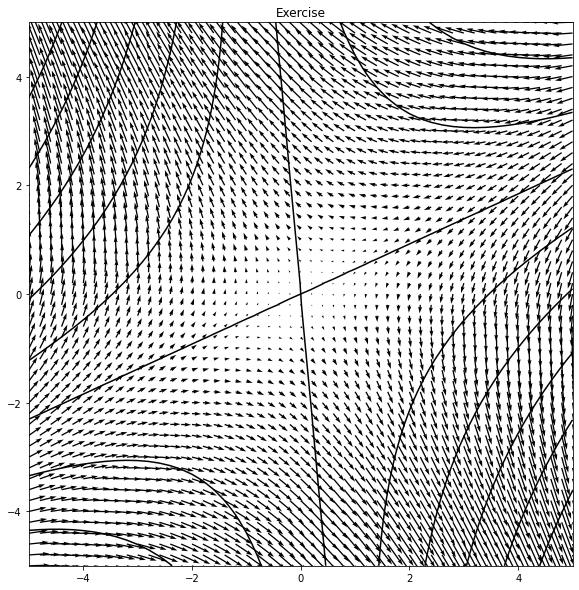

In [0]:
#TODO
fig, ax = plt.subplots(figsize=(10, 10))
plt.axis([-5, 5, -5, 5])

ax.contour(X, Y, quad(F, X, Y), 10, colors='k', linestyles='solid')
U, V = action(F, X, Y)
ax.quiver(X, Y, U, V, edgecolor='k', scale=200)
ax.set_aspect("equal")
ax.set_title("Exercise")
plt.show()

## Power Methods

When trying to find the largest eigenvalue and eigenvector of a symmetric matrix, a powerful and intuitive algorithm you can use is the __power method__.

Starting from a random unit-norm vector $v_0$, you iteratively compute 
$$
v_k = \frac{A^k v_0}{\|A^k v_0\|}.
$$
This means that, at every iteration $t$ you perform the computation:
$$
v_{t+1} = \frac{A v_t}{\|A v_t\|}. 
$$

The following code shows how $v_i$ changes in iterations $i=0,1,2,3,4$ when applied to the matrix 

$$
A = \begin{pmatrix}
      3.25 & -3.9 \\
      -3.9 & 7.75
    \end{pmatrix}
$$

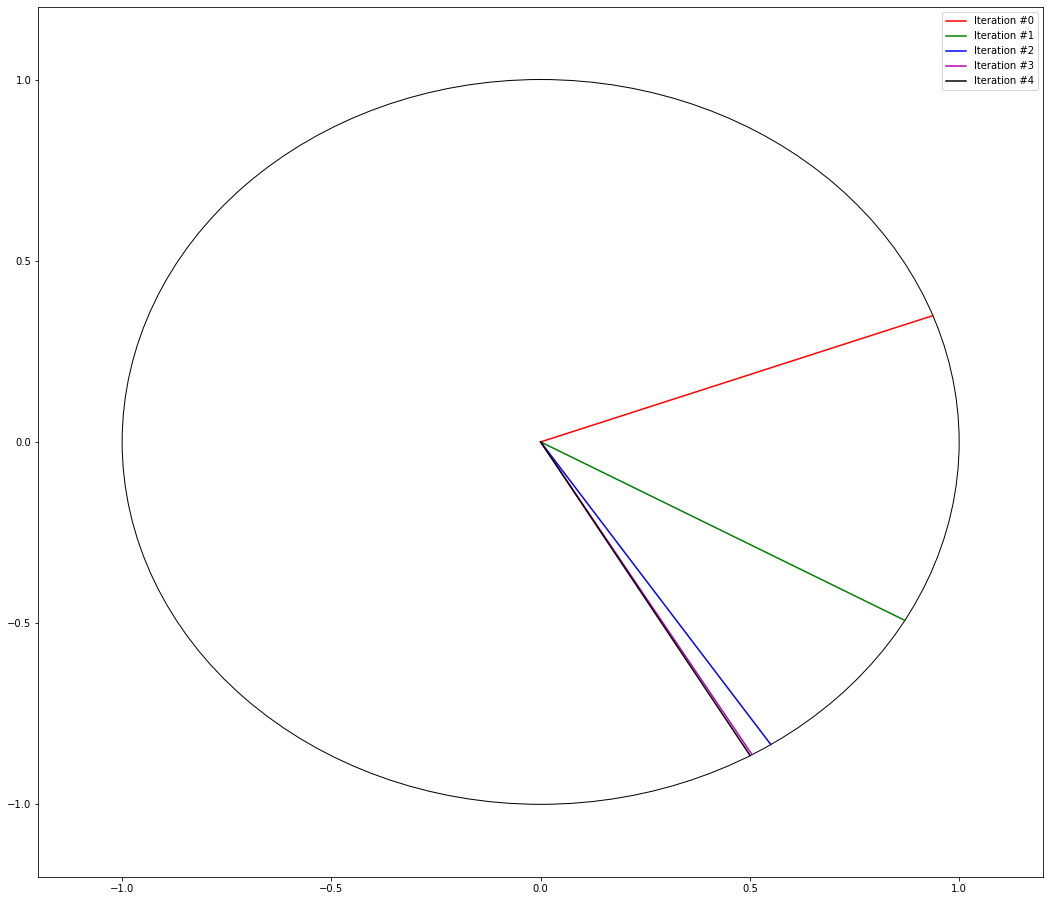

In [0]:
A = np.array([[3.25, -3.9], [-3.9, 7.75]])
colors=['r', 'g', 'b', 'm', 'k']
np.random.seed(6)
fig, ax = plt.subplots(figsize=(18, 16))
u = np.random.rand(2)
circ = plt.Circle((0, 0), 1, fill=False)
ax.add_artist(circ)
for i in range(5):
    u /= np.linalg.norm(u)
    plt.plot([0, u[0]], [0, u[1]], color=colors[i], label="Iteration #{}".format(i))
    u = A @ u
plt.axis([-1.2, 1.2, -1.2, 1.2])
plt.legend()
plt.show()

Give a brief justification of why we expect $v_k$ to converge to a maximum eigenvector of $A$ as $k$ goes to infinity by writing the eigenvector decomposition of $v_k$. You can also practice writing Markdown with integrated LaTex!

 **TODO**

Let $A$ be an n * n real symmetric matrix. It has an orthonormal set of eigenvectors $\{e_1, \dots, e_n\}$ and eigenvalues $\lambda_1 \geq \dots \geq \lambda_n$.

We can express $v_k$ in the orthonormal basis $\{e_1, \dots, e_n\}$, with constants $c_1, \dots, c_n$
$$v_k = c_1e_1 + \dots + c_ne_n$$

$$A = \sum_{i=1}^n \lambda_i e_i e_i^T$$
Because $e_i^Te_j = 0$ for $i \neq j$.
$$Ae_1 = \lambda_1 e_1 e_1^Te_1 + \lambda_2 e_2 e_2^Te_1 + \dots = \lambda_1 e_1$$
Similarly for other eigenvectors, we have $Ae_1 = \lambda_1e_1, \dots, Ae_n = \lambda_ne_n$.

$$Av_k = c_1Ae_1 + \dots + c_nAe_n = c_1\lambda_1 e_1 + \dots + c_n\lambda_n e_n$$
$$A^kv_k = c_1\lambda_1^k e_1 + \dots + c_n\lambda_n^k e_n$$
$$A^kv_k = \lambda_1^k \Big[ c_1e_1 + c_2\Big(\frac{\lambda_2}{\lambda_1}\Big)^k e_2 + \dots + c_3\Big(\frac{\lambda_3}{\lambda_1}\Big)^k e_3 \Big]$$

Assuming $\lambda_1$ is the maximum eigenvalue of $A$, for $i=2,\dots,n$, $\frac{\lambda_i}{\lambda_1} < 1$ and $\Big(\frac{\lambda_i}{\lambda_1}\Big)^k \rightarrow 0$ as $k \rightarrow \infty$.

$$A^kv_k = \lambda_1^k c_1e_1$$
$$\|A^kv_k\| = \lambda_1^k c_1 \|e_1\| = \lambda_1^k c_1$$
$$v_k = \frac{A^k v_0}{\|A^k v_0\|} = \frac{\lambda_1^k c_1e_1}{\lambda_1^k c_1} = e_1$$

We've shown that $v_k$ converges to a maximum eigenvector $e_1$ of $A$ as $k \rightarrow \infty$.

## Differentiation

We are interested in the following function
$f(x_1, x_2) = x_1^4 + x_2^4 − x_1 x_2^3 − x_1^2 x_2^2+ x_1^3 + x_2^3.$

### Symbolic Differentiation

Using the sympy module, we can differentiate the function symbolically.

In [0]:
import sympy as sp
from sympy.tensor.array import derive_by_array

x, y = sp.symbols('x,y')                                        # Define symbols x and y
fun = x**4 + y**4 - x*(y**3) - (x**2)*(y**2) + x**3 + y**3      # Define a symbolic expression corresponding to f
numfun = sp.lambdify((x,y), fun)                                # This command turns the symbolic expression f into 
                                                                # a numerical function of two arguments
grad = derive_by_array(fun, [x,y])  
print(grad)                            # Computes the gradient of the symbolic expression expr
numgrad = sp.lambdify((x,y),grad)                               # Numerical version of the gradient
print(numgrad(1,1))

hessian = derive_by_array(grad, [x,y])
numhessian = sp.lambdify((x,y),hessian)          

#### Try to print out fun, grad and hessian to check the corresponding symbolic expression.
#### What happens when you try to print the numerical functions?
print(fun)
print(numfun)
print(hessian)
print(numhessian)

[4*x**3 + 3*x**2 - 2*x*y**2 - y**3, -2*x**2*y - 3*x*y**2 + 4*y**3 + 3*y**2]
[4, 2]
x**4 + x**3 - x**2*y**2 - x*y**3 + y**4 + y**3
<function <lambda> at 0x7fd53d558d08>
[[12*x**2 + 6*x - 2*y**2, -4*x*y - 3*y**2], [-4*x*y - 3*y**2, -2*x**2 - 6*x*y + 12*y**2 + 6*y]]
<function <lambda> at 0x7fd53d560ae8>


### Numerical Evaluation

The numerical functions are actual python functions which we can evaluate numerically and plot.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # Object need for 3D plots

xvals = np.arange(-5,5,0.2)               # Return an array containing evenly spaced values (spaced by -0.2)
yvals = np.arange(-5,5,0.2)               # in the open interval [-5,5)

X, Y = np.meshgrid(xvals, yvals)          # Same as MATLAB meshgrid: returns coordinate matrices from coordinate vectors.

F = numfun(X,Y)                           # Evaluates numfun on the grid (X,Y)

### Plotting

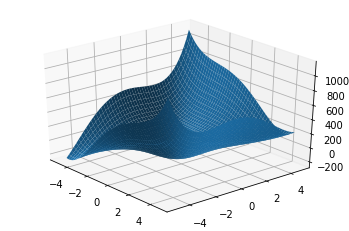

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,F)
ax.view_init(azim=320)                     # Rotates the plot by 10 degrees. Try changing the angle.
plt.show()

### Contour and Gradient Plot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


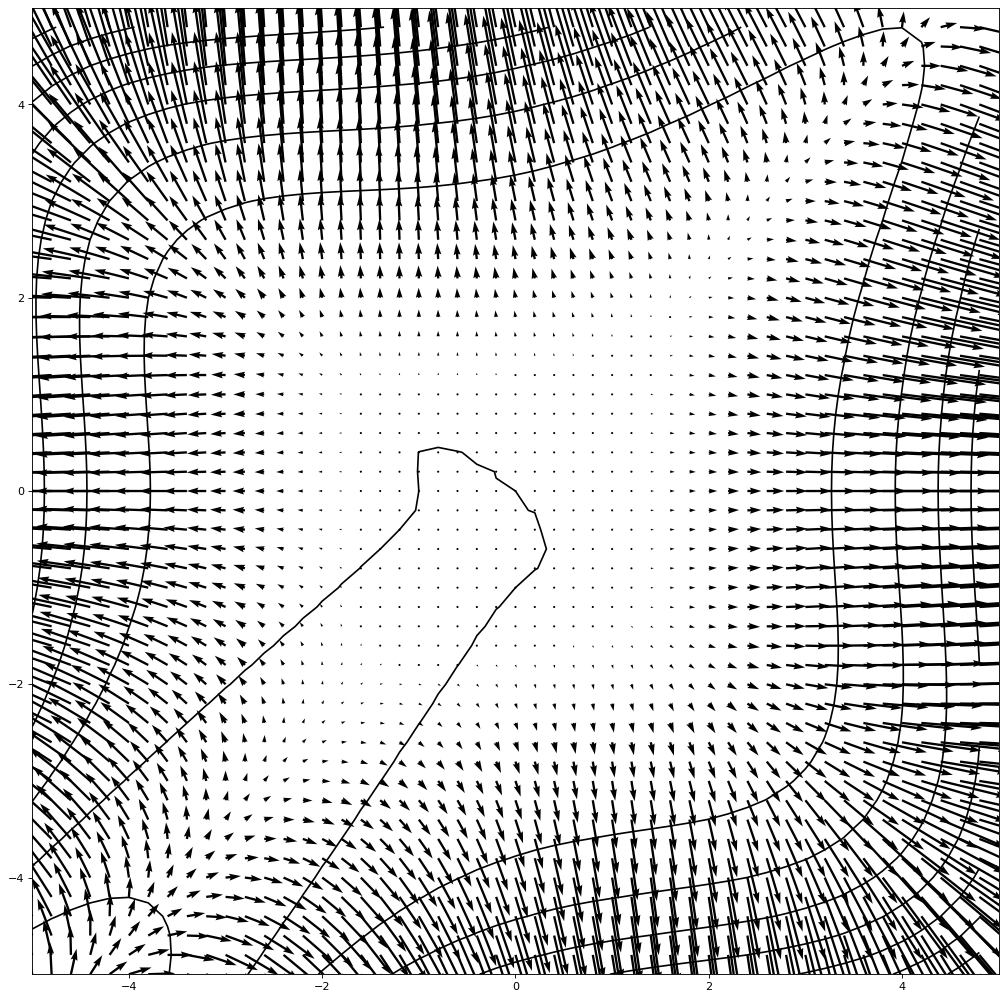

In [0]:
U,V = numgrad(X,Y)                         # Evaluates the gradient coordinates on the grid (X,Y)

plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.contour(X, Y, F, 10, colors = 'k', linestyles = 'solid')        # Generates the contour plot for f
plt.axes().set_aspect('equal')                                      # Scale the plot size to get same aspect ratio
plt.axis([-5, 5, -5, 5])

plt.quiver(X, Y, U, V, edgecolor='k', scale = 5000)                 # Plots the vecotr field U,V over the grid (X,Y)
                                                                    # while scaling the arrows by the scale factor

plt.show()

## Computing the eigenvalues of a matrix

Let's compute the hessian of $f$ at point $(0,1)$.

In [0]:
H = numhessian(0,1)

How can we check if it is positive semidefinite? We can find its eigenvalues using the following command. In this case one is negative and the other is positive, so the hessian is indefinite.

In [0]:
w,v = np.linalg.eigh(H)   # w contains the eigenvalues, v the eigenvectors. The h in eigh stands for Hermitian.

w                         # print w

array([-2.44030651, 18.44030651])

# Exercise: It's your turn

Consider the function given by the quadratic form of the Hessian at point (1,1). That is the function:
$$
g(\vec{z}) = z^T \; \nabla^2 f(1,1) \; z
$$

Adapt the code above to produce the following plots: 

1. 3d-representation of $g$ over $[-5,5]\times [-5,5]$ 
2. A contour-and-gradient plot of $g$ over the same square

In [0]:
numhessian(1, 1)

[[16, -7], [-7, 10]]

$$\begin{bmatrix}x&y\end{bmatrix}
\begin{bmatrix}16 & -7\\ -7 & 10\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix} \\
= \begin{bmatrix}16x-7y & -7x+10y\end{bmatrix} \begin{bmatrix}x\\y\end{bmatrix}
$$

In [0]:
# TODO
x, y = sp.symbols('x,y')
g = (16*x - 7*y) * x + (-7*x + 10*y) * y
num_g = sp.lambdify((x, y), g)
g

x*(16*x - 7*y) + y*(-7*x + 10*y)

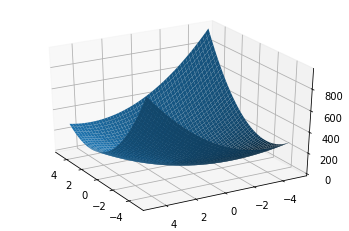

In [0]:
# 1.
xvals = np.arange(-5,5,0.2)               # Return an array containing evenly spaced values (spaced by -0.2)
yvals = np.arange(-5,5,0.2)               # in the open interval [-5,5)
X, Y = np.meshgrid(xvals, yvals)          # Same as MATLAB meshgrid: returns coordinate matrices from coordinate vectors.
F = num_g(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,F)
ax.view_init(azim=150)                     # Rotates the plot by 10 degrees. Try changing the angle.
plt.show()

In [0]:
grad_g = derive_by_array(g, [x,y])  
print(grad_g)                            # Computes the gradient of the symbolic expression expr
numgrad_g = sp.lambdify((x,y),grad_g) 

[32*x - 14*y, -14*x + 20*y]


In [0]:
# 2.
U,V = numgrad_g(X,Y)                         # Evaluates the gradient coordinates on the grid (X,Y)

plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.contour(X, Y, F, 10, colors = 'k', linestyles = 'solid')        # Generates the contour plot for f
plt.axes().set_aspect('equal')                                      # Scale the plot size to get same aspect ratio
plt.axis([-5, 5, -5, 5])

plt.quiver(X, Y, U, V, edgecolor='k', scale = 5000)                 # Plots the vecotr field U,V over the grid (X,Y)
                                                                    # while scaling the arrows by the scale factor

plt.show()

NameError: ignored

## Problem 6

Remember the Least Squares Example we saw in lecture.

In [0]:
import numpy as np # used for random number generation
import cvxpy as cp

m = 16
n=8
A = np.random.randn(m,n) # random problem instance
b = np.random.randn(m)

x = cp.Variable(n)

obj = cp.Minimize(cp.norm(A*x - b))
# obj = cp.Maximize(cp.norm(A*x - b)) # what do you think happens when we try to maximize the same objective?
"""
DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP, even though each sub-expression is.
You are trying to maximize a function that is convex.
"""
# obj = cp.Minimize((A*x - b).T * (A*x-b)) # can you guess why this doesn't work?
"""
cp.norm(A*x - b) is an object Expression(CONVEX, NONNEGATIVE, ())
(A*x - b).T * (A*x-b) is an object Expression(UNKNOWN, UNKNOWN, ())
"""

prob = cp.Problem(obj)
prob.solve() # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status: optimal
optimal value 2.2056511351542403
optimal var [ 0.06840741 -0.12363462  0.45024471  0.65650809  0.1535833   0.18979963
  0.09329294  0.1849226 ]


The variation we saw is the LASSO-regularized least-squares problem, where the objective is:
$$
\|Ax - b\|^2 + \rho \cdot \|x\|_1^2
$$
with $\rho \geq 0.$

What do you expect the value of $\|Ax - b\|^2$ to be relative to the value of $\rho$?

**Answer**: The value of $\|Ax-b\|^2$ should be significantly larger than $\rho$ since $\rho$ is only serving as a penalizer term.

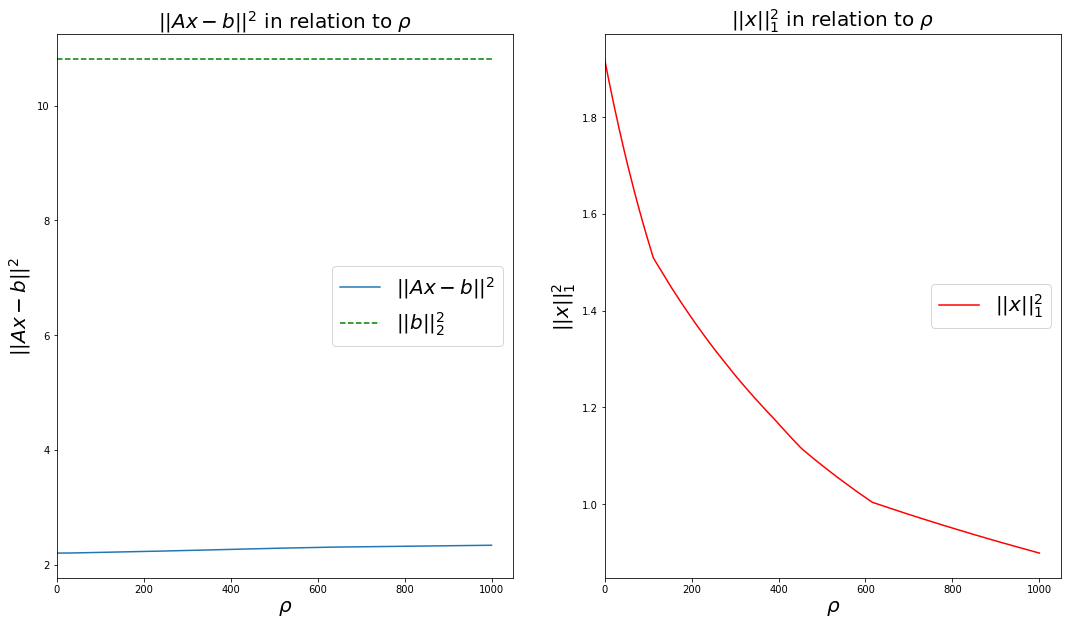

In [0]:
norm2 = np.zeros(1001)
norm1 = np.zeros(1001)

# TODO: set r to 1001 linearly equispaced values between 0 and 1000
r = np.arange(0, 1001)

# TODO: For every rho value solve the problem and store the results of ||Ax -b||^2 and ||x||_1^2 in norm2 and norm1
for value in r:
    rho = cp.Parameter(nonneg=True, value=value/1000)
    obj = cp.Minimize((cp.norm(A*x - b))**2+rho*(cp.norm(x,1))**2)
    prob = cp.Problem(obj)
    prob.solve()
    norm2[value] = np.linalg.norm(A @ np.array(x.value) - b)
    norm1[value] = np.linalg.norm(x.value, ord=1)

fig, ax = plt.subplots(1, 2, figsize=(18, 10))
ax[0].plot(r, norm2, label=r"$||Ax - b||^2$")
ax[0].hlines(np.linalg.norm(b)**2, 0, 1000, colors='g', linestyles='dashed', label=r"$||b||_2^2$")
ax[0].set_xlabel(r'$\rho$', fontsize=20)
ax[0].set_ylabel(r'$||Ax - b||^2$', fontsize=20)
ax[0].set_xlim(xmin=0)
ax[0].set_title(r"$||Ax - b||^2$ in relation to $\rho$", fontsize=20)
ax[0].legend(loc="center right", fontsize=20)

ax[1].plot(r, norm1, 'r-', label=r"$||x||_1^2$")
ax[1].set_xlabel(r'$\rho$', fontsize=20)
ax[1].set_ylabel(r'$||x||_1^2$', fontsize=20)
ax[1].set_xlim(xmin=0)
ax[1].set_title(r"$||x||_1^2$ in relation to $\rho$", fontsize=20)
ax[1].legend(loc="center right", fontsize=20)

plt.show()

## Maximum flow

You will use `cvxpy` to formulate maximum flow on a graph. You will use the toy graph karate club fron `networkx`, a python graph library.

This is a graph of relationships in a Karate club that actually split up in two around the two central nodes, 1 and 33

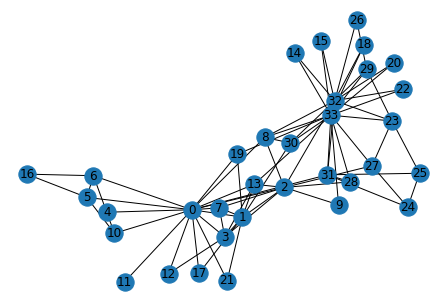

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

np.random.seed(2)
G = nx.karate_club_graph()
n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)

In [38]:
import cvxpy as cp
from collections import defaultdict

node_var = cp.Variable(n)
edge_var = cp.Variable(m)

s = 0
t = 33

# TODO
constraints = [edge_var >= -1,
               edge_var <= 1]                # The flow going through each edge must in [-1, 1]
  

in_edge_dict = defaultdict(list)
out_edge_dict = defaultdict(list)

for i, (v, w) in enumerate(G.edges):            # Give edges directionality
    if not w in in_edge_dict:
      in_edge_dict[w] = [i]
    else:
      in_edge_dict[w].append(i) # edge_var[i] is an incoming edge to w
    if not v in out_edge_dict:
      out_edge_dict[v] = [i]
    else:
      out_edge_dict[v].append(i) # edge_var[i] is an outgoing edge from v

# The sum of the flows going in and out of each node other than s and t must be 0
# u->v->w, sum f_uv - sum_vw = 0
for node in G.nodes:                            
    in_edge_vars = []
    for i in in_edge_dict[node]:
      in_edge_vars.append(edge_var[i])
    out_edge_vars = []
    for o in out_edge_dict[node]:
      out_edge_vars.append(edge_var[o])
    in_sum = sum(in_edge_vars)
    out_sum = sum(out_edge_vars)
    # For each node the node_var must be equal to the sum of the adjacent edges
    if node == s:
      constraints.append(node_var[node] == out_sum)
    elif node == t:
      constraints.append(node_var[node] == in_sum)
    else:
      constraints.extend([in_sum == out_sum,
                          node_var[node] == in_sum])
    
obj = cp.Maximize(node_var[s])                  # The objective is to maximize the flow going out of node 0

prob = cp.Problem(obj, constraints)
prob.solve()

print("status:", prob.status)
print("optimal value", prob.value)
print("optimal flow", edge_var.value)
print("optimal capacity", node_var.value)

status: optimal
optimal value 9.99999998594123
optimal flow [ 9.17275379e-01  9.99999998e-01  9.20887743e-01 -1.39789952e-14
 -1.52565489e-14 -8.32850759e-15  9.29095001e-01  9.99999999e-01
 -5.10377469e-15 -8.53355500e-15  8.02775566e-01  9.15072646e-01
  8.12813817e-01  8.89266021e-01  8.12813817e-01  9.99999999e-01
  9.99999998e-01 -8.70284863e-02 -7.14047661e-03  5.26338000e-01
 -8.12813817e-01  1.10733979e-01 -8.12813817e-01  9.99999999e-01
 -9.99999999e-01 -9.99999999e-01  9.99999998e-01  9.99999998e-01
 -9.99999997e-01  9.99999998e-01  9.99999997e-01  9.99999998e-01
  7.80454742e-02 -8.02775566e-01  5.58589350e-01 -4.25135834e-15
 -1.19407205e-15 -4.58891229e-15 -2.23570818e-15  1.01662089e-16
 -8.63521675e-15  4.51700867e-01  7.43690998e-01  8.04608133e-01
  9.99999998e-01  9.99999999e-01 -3.52011016e-01  3.52011016e-01
 -3.52011016e-01  3.52011016e-01 -3.52011016e-01  3.52011016e-01
  9.99999999e-01 -3.52011016e-01  3.52011016e-01 -3.52011016e-01
  3.52011016e-01 -2.87886529e-

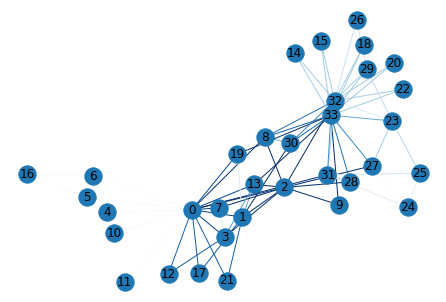

In [39]:
nx.draw(G, pos=pos, with_labels=True, edge_color=np.abs(edge_var.value), edge_cmap=plt.cm.Blues)